In [1]:
# Imports
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from scipy import stats
import statistics
import warnings


In [2]:
# file path - this for linux windows you will need "//"
f_path = "conn_attack.csv"

df = pd.read_csv(f_path,names=["record ID","duration_", "src_bytes","dst_bytes"], header=None)

In [3]:
df=df.dropna()

In [4]:
df.head()

,record ID,duration_,src_bytes,dst_bytes
0,1,0,236,1228
1,2,0,239,486
2,3,0,234,1364
3,4,0,239,1295
4,5,0,181,5450


In [5]:
df.describe()

,record ID,duration_,src_bytes,dst_bytes
count,256670.000000,256670.000000,256670.000000,2.566700e+05
mean,128335.500000,0.640936,474.247898,4.473533e+03
std,74094.391134,15.627170,3391.106084,2.080903e+04
min,1.000000,0.000000,0.000000,0.000000e+00
25%,64168.250000,0.000000,217.000000,6.600000e+02
50%,128335.500000,0.000000,249.000000,1.661000e+03
75%,192502.750000,0.000000,306.000000,4.341000e+03
max,256670.000000,3289.000000,54540.000000,7.068759e+06


In [6]:
# import matplotlib.pyplot as plt
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import RepeatedStratifiedKFold
# from sklearn.neighbors import KNeighborsClassifier
# from sklearn.pipeline import Pipeline

# x = df.iloc[:,1:2]
# y = df.iloc[:,0]


# plt.scatter(x, y)
# plt.show()



# # define the pipeline
# trans = MinMaxScaler()
# model = KNeighborsClassifier()
# pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# # evaluate the pipeline
# cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# n_scores = cross_val_score(pipeline, x, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# # report pipeline performance
# print('Accuracy: %.3f (%.3f)' % (mean(n_scores), std(n_scores)))

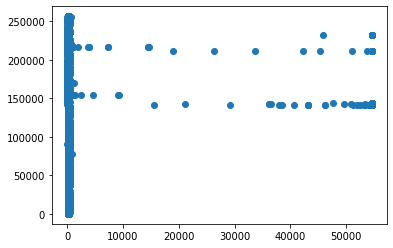

In [7]:
x = df.iloc[:,2:3]
y = df.iloc[:,0]
plt.scatter(x, y)
plt.show()

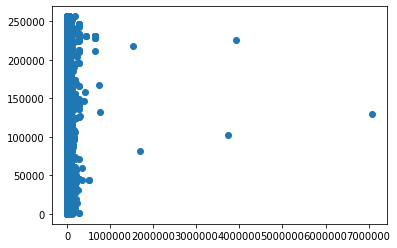

In [8]:
x = df.iloc[:,3:4]
y = df.iloc[:,0]
plt.scatter(x, y)
plt.show()

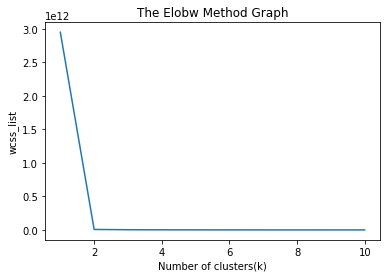

In [9]:
import numpy as nm        
import pandas as pd  


x = df.iloc[:, [1, 2]].values  

#finding optimal number of clusters using the elbow method  
from sklearn.cluster import KMeans  
wcss_list= []  #Initializing the list for the values of WCSS  
  
#Using for loop for iterations from 1 to 10.  
for i in range(1,11):  
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state= 42)  
    kmeans.fit(x)  
    wcss_list.append(kmeans.inertia_)  
plt.plot(range(1, 11), wcss_list)  
plt.title('The Elobw Method Graph')  
plt.xlabel('Number of clusters(k)')  
plt.ylabel('wcss_list')  
plt.show()  

In [10]:
#Our algorithm#
df = pd.read_csv(f_path,names=["record ID","duration", "src_bytes","dst_bytes"], header=None)

ratio = []

#duration mean + standard deviation
dt_mean = df["duration"].mean()
dt_std = df["duration"].std()

#src_bytes mean + standard deviation
src_mean = df["src_bytes"].mean()
src_std = df["src_bytes"].std()

#dst_bytes mean + standard deviation
dst_mean = df["dst_bytes"].mean()
dst_std = df["dst_bytes"].std()



sum_ratio = 0.0
lengthCSV = len(df)
for i in range(lengthCSV) :
    if df.iloc[i, 3] != 0 :
      ratio.append(df.iloc[i, 2]/df.iloc[i, 3])
      sum_ratio += (df.iloc[i, 2]/df.iloc[i, 3])
    else: 
        ratio.append(0)
   

# Print mean standard deviation
print("Standard Deviation of duration is: " + str(dt_std))
print("duration mean : " + str(dt_mean))

# Print mea standard deviation
print("Standard Deviation of src_bytes is: " + str(src_std))
print("duration mean : " + str(src_mean))

# Print mean standard deviation
print("Standard Deviation of dst_bytes is: " + str(dst_std))
print("duration mean : " + str(dst_mean))


ratio_std = statistics.pstdev(ratio)
ratio_mean = sum_ratio/lengthCSV

print("Standard Deviation of ratio is :"+str(ratio_std))
print("ratio mean : " + str(ratio_mean))

anomaly = []
for i in range(lengthCSV) :
      if(df.iloc[i, 1]>dt_mean+dt_std or df.iloc[i, 2]>src_mean+src_std or df.iloc[i, 3]>dst_mean+dst_std or ratio[i]>ratio_mean+ratio_std ):
                anomaly.append(df.iloc[i,0])

#print(anomaly)
print(len(anomaly))


Standard Deviation of duration is: 15.627170079023282
duration mean : 0.6409358320021817
Standard Deviation of src_bytes is: 3391.1060841362632
duration mean : 474.2478980792457
Standard Deviation of dst_bytes is: 20809.03454676088
duration mean : 4473.532613862158
Standard Deviation of ratio is :0.9178279817228151
ratio mean : 0.3201304771892098
13134


In [11]:
from scipy.stats import normaltest
# normality test
stat, p = normaltest(df["duration"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=926118.990, p=0.000
Sample does not look Gaussian (reject H0)


In [12]:
from scipy.stats import normaltest
# normality test
stat, p = normaltest(df["src_bytes"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=498261.207, p=0.000
Sample does not look Gaussian (reject H0)


In [13]:
from scipy.stats import normaltest
# normality test
stat, p = normaltest(df["dst_bytes"])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
	print('Sample looks Gaussian (fail to reject H0)')
else:
	print('Sample does not look Gaussian (reject H0)')

Statistics=1268450.734, p=0.000
Sample does not look Gaussian (reject H0)


In [14]:
# # QQ Plot
# from numpy.random import seed
# from numpy.random import randn
# from statsmodels.graphics.gofplots import qqplot
# from matplotlib import pyplot

# # generate univariate observations
# data = ratio
# # q-q plot
# qqplot(data, line='s')
# pyplot.show()

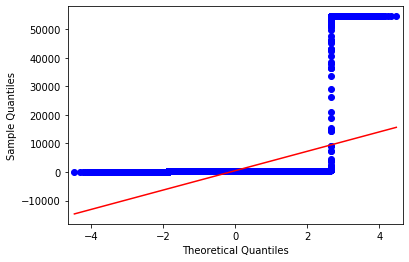

In [15]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# generate univariate observations
data = df["src_bytes"]
# q-q plot
qqplot(data, line='s')
pyplot.show()

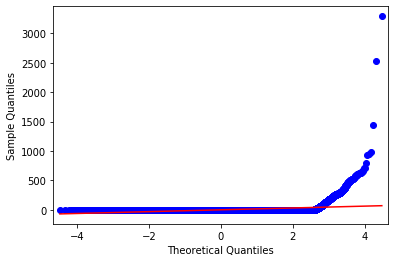

In [16]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# generate univariate observations
data = df["duration"]
# q-q plot
qqplot(data, line='s')
pyplot.show()

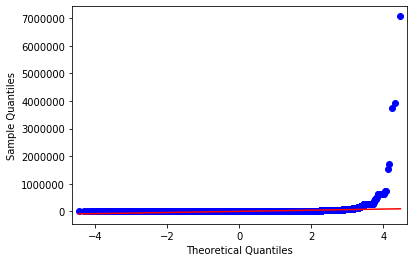

In [17]:
# QQ Plot
from numpy.random import seed
from numpy.random import randn
from statsmodels.graphics.gofplots import qqplot
from matplotlib import pyplot

# generate univariate observations
data = df["dst_bytes"]
# q-q plot
qqplot(data, line='s')
pyplot.show()

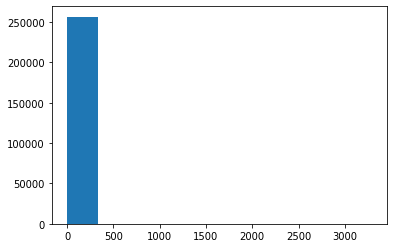

In [18]:
# histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot

# generate univariate observations
data = df["duration"]
# histogram plot
pyplot.hist(data)
pyplot.show()

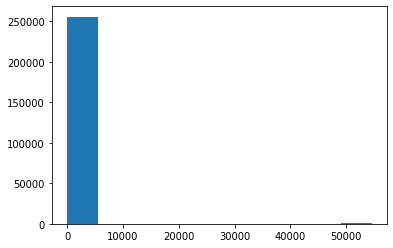

In [19]:
# histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot

# generate univariate observations
data = df["src_bytes"]
# histogram plot
pyplot.hist(data)
pyplot.show()

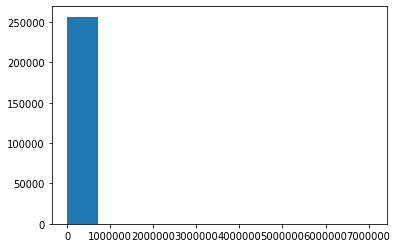

In [20]:
# histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot

# generate univariate observations
data = df["dst_bytes"]
# histogram plot
pyplot.hist(data)
pyplot.show()

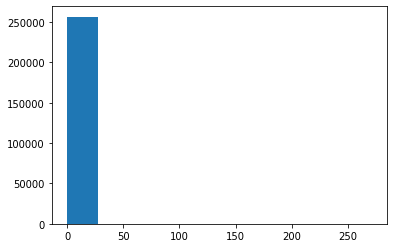

In [21]:
# histogram plot
from numpy.random import seed
from numpy.random import randn
from matplotlib import pyplot

# generate univariate observations
data = ratio
# histogram plot
pyplot.hist(data)
pyplot.show()

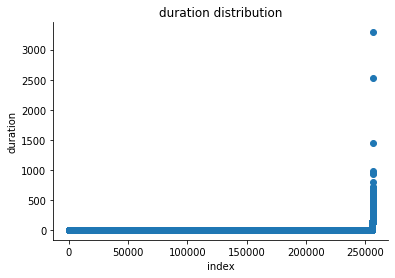

In [22]:
plt.scatter(range(df.shape[0]), np.sort(df['duration'].values))
plt.xlabel('index')
plt.ylabel('duration')
plt.title("duration distribution")
sns.despine()

C:\Users\Naor\anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


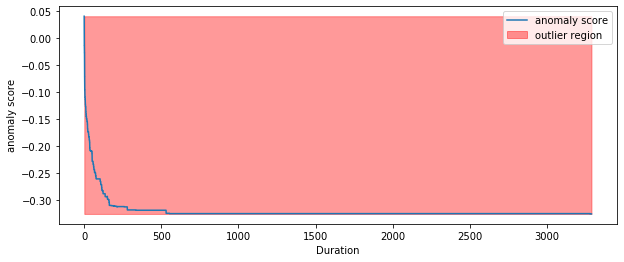

In [23]:
from sklearn.ensemble import IsolationForest

isolation_forest = IsolationForest(n_estimators=100)
isolation_forest.fit(df['duration'].values.reshape(-1, 1))
xx = np.linspace(df['duration'].min(), df['duration'].max(), len(df)).reshape(-1,1)
anomaly_score = isolation_forest.decision_function(xx)
outlier = isolation_forest.predict(xx)
plt.figure(figsize=(10,4))
plt.plot(xx, anomaly_score, label='anomaly score')
plt.fill_between(xx.T[0], np.min(anomaly_score), np.max(anomaly_score), 
                 where=outlier==-1, color='r', 
                 alpha=.4, label='outlier region')
plt.legend()
plt.ylabel('anomaly score')
plt.xlabel('Duration')
plt.show();

In [25]:
#In order for this to work you need to install this module
#pip install pyod  or
#git clone https://github.com/yzhao062/pyod.git
#cd pyod
#pip install .
#from:
#https://github.com/yzhao062/pyod

from pyod.models.cblof import CBLOF

outliers_fraction = 0.01
xx , yy = np.meshgrid(np.linspace(0, 1, 100), np.linspace(0, 1, 100))
clf = CBLOF(contamination=outliers_fraction,check_estimator=False, random_state=0)
clf.fit(X)
scores_pred = clf.decision_function(X) * -1
y_pred = clf.predict(X)
n_inliers = len(y_pred) - np.count_nonzero(y_pred)
n_outliers = np.count_nonzero(y_pred == 1)

plt.figure(figsize=(8, 8))

df1 = df
df1['outlier'] = y_pred.tolist()
    
# sales - inlier feature 1,  profit - inlier feature 2
inliers_sales = np.array(df1['src_bytes'][df1['outlier'] == 0]).reshape(-1,1)
inliers_profit = np.array(df1['dst_bytes'][df1['outlier'] == 0]).reshape(-1,1)
    
# sales - outlier feature 1, profit - outlier feature 2
outliers_sales = df1['src_bytes'][df1['outlier'] == 1].values.reshape(-1,1)
outliers_profit = df1['dst_bytes'][df1['outlier'] == 1].values.reshape(-1,1)
         
print('OUTLIERS:',n_outliers,'INLIERS:',n_inliers)
threshold = percentile(scores_pred, 100 * outliers_fraction)        
Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()]) * -1
Z = Z.reshape(xx.shape)

plt.contourf(xx, yy, Z, levels=np.linspace(Z.min(), threshold, 7),cmap=plt.cm.Blues_r)
a = plt.contour(xx, yy, Z, levels=[threshold],linewidths=2, colors='red')
plt.contourf(xx, yy, Z, levels=[threshold, Z.max()],colors='orange')
b = plt.scatter(inliers_sales, inliers_profit, c='white',s=20, edgecolor='k')
    
c = plt.scatter(outliers_sales, outliers_profit, c='black',s=20, edgecolor='k')
       
plt.axis('tight')   
plt.legend([a.collections[0], b,c], ['learned decision function', 'inliers','outliers'],
           prop=matplotlib.font_manager.FontProperties(size=20),loc='lower right')      
plt.xlim((0, 1))
plt.ylim((0, 1))
plt.title('Cluster-based Local Outlier Factor (CBLOF)')
plt.show();

ModuleNotFoundError: No module named 'pyod'